In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [2]:
!wget -c https://raw.githubusercontent.com/udacity/DL_PyTorch/master/fc_model.py

--2022-07-18 20:11:40--  https://raw.githubusercontent.com/udacity/DL_PyTorch/master/fc_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3542 (3.5K) [text/plain]
Saving to: 'fc_model.py'

     0K ...                                                   100% 2.44M=0.001s

2022-07-18 20:11:40 (2.44 MB/s) - 'fc_model.py' saved [3542/3542]



In [4]:
import fc_model # just the network in a different file

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

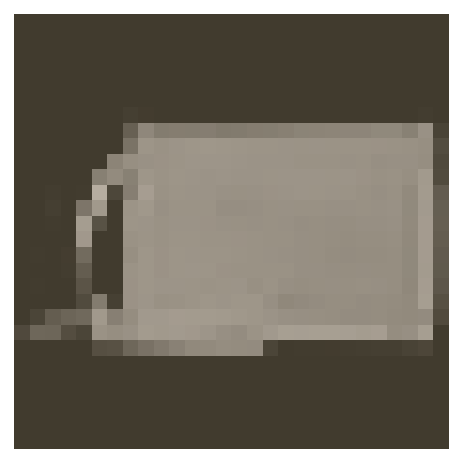

In [6]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [7]:
model = fc_model.Network(784,10,[516,256], drop_p = 0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
fc_model.train(model,trainloader,testloader,criterion,optimizer,epochs=2)

Epoch: 1/2..  Training Loss: 1.287..  Test Loss: 0.773..  Test Accuracy: 0.720
Epoch: 1/2..  Training Loss: 0.799..  Test Loss: 0.685..  Test Accuracy: 0.743
Epoch: 1/2..  Training Loss: 0.714..  Test Loss: 0.624..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.698..  Test Loss: 0.577..  Test Accuracy: 0.785
Epoch: 1/2..  Training Loss: 0.649..  Test Loss: 0.555..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.619..  Test Loss: 0.543..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.635..  Test Loss: 0.526..  Test Accuracy: 0.806
Epoch: 1/2..  Training Loss: 0.602..  Test Loss: 0.511..  Test Accuracy: 0.811
Epoch: 1/2..  Training Loss: 0.592..  Test Loss: 0.516..  Test Accuracy: 0.813
Epoch: 1/2..  Training Loss: 0.552..  Test Loss: 0.536..  Test Accuracy: 0.802
Epoch: 1/2..  Training Loss: 0.559..  Test Loss: 0.490..  Test Accuracy: 0.819
Epoch: 1/2..  Training Loss: 0.575..  Test Loss: 0.522..  Test Accuracy: 0.804
Epoch: 1/2..  Training Loss: 0.557..  Test Loss: 0.4

In [9]:
print(model)
print(model.state_dict().keys())

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


In [10]:
torch.save(model.state_dict(),'checkpoints.pth')

In [11]:
state_dict = torch.load('checkpoints.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'output.weight', 'output.bias'])


In [12]:
model.load_state_dict(state_dict) # load the state dictionary in the model

<All keys matched successfully>

In [14]:
model = fc_model.Network(784,10,[400,200,100])
model.load_state_dict(state_dict) # will result in an error
# so we need to save the Net architecture alongisde the state dict

RuntimeError: Error(s) in loading state_dict for Network:
	Missing key(s) in state_dict: "hidden_layers.2.weight", "hidden_layers.2.bias". 
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([516, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([516]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 516]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 256]) from checkpoint, the shape in current model is torch.Size([10, 100]).

In [18]:
checkpoint = {'input_size': 784,
              'output_size':10,
              'hidden_layers' : [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint,'checkpoint.pth')

In [19]:
def load_checkpoint(filepath):

    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])

    model.load_state_dict(checkpoint['state_dict'])

    return model

In [22]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [36]:
fc_model.Network(784,10,[516,216,100])
fc_model.train(model,trainloader,testloader,criterion,optimizer,epochs=2)

Epoch: 1/2..  Training Loss: 2.312..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.311..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.313..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.314..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.310..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.317..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.309..  Test Loss: 2.308..  Test Accuracy: 0.096
Epoch: 1/2..  Training Loss: 2.312..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.310..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.313..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.313..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.311..  Test Loss: 2.308..  Test Accuracy: 0.095
Epoch: 1/2..  Training Loss: 2.315..  Test Loss: 2.3

In [37]:
test_loss = 0
images, labels = next(iter(testloader))

images.resize_(images.shape[0],784)

output = model.forward(images)
test_loss += criterion(output,labels).item()

ps = torch.exp(output)

In [38]:
ps.max(dim=1)

torch.return_types.max(
values=tensor([0.1230, 0.1226, 0.1312, 0.1131, 0.1318, 0.1190, 0.1198, 0.1194, 0.1248,
        0.1160, 0.1286, 0.1220, 0.1229, 0.1226, 0.1185, 0.1255, 0.1187, 0.1243,
        0.1264, 0.1164, 0.1199, 0.1271, 0.1244, 0.1209, 0.1250, 0.1259, 0.1152,
        0.1258, 0.1144, 0.1189, 0.1161, 0.1320, 0.1165, 0.1234, 0.1219, 0.1223,
        0.1354, 0.1180, 0.1203, 0.1175, 0.1333, 0.1267, 0.1287, 0.1155, 0.1142,
        0.1472, 0.1281, 0.1160, 0.1217, 0.1229, 0.1223, 0.1227, 0.1159, 0.1250,
        0.1124, 0.1225, 0.1111, 0.1280, 0.1174, 0.1100, 0.1167, 0.1282, 0.1209,
        0.1167], grad_fn=<MaxBackward0>),
indices=tensor([2, 6, 0, 6, 8, 2, 2, 2, 2, 2, 6, 3, 3, 3, 3, 6, 8, 2, 3, 3, 2, 6, 2, 2,
        2, 2, 6, 2, 2, 2, 3, 3, 3, 3, 8, 2, 7, 2, 2, 2, 3, 2, 3, 8, 6, 3, 8, 3,
        8, 2, 2, 2, 2, 3, 6, 2, 2, 8, 2, 4, 0, 3, 2, 3]))

In [39]:
equalit = (labels.data == ps.max(dim=1)[1])
equalit

tensor([ True, False, False, False, False,  True, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
         True, False, False, False, False, False, False,  True, False, False,
         True, False, False, False])

In [40]:
accurac = equalit.type(torch.FloatTensor).mean()
accurac

tensor(0.1406)